### 4.10 O caixeiro que prefere cidades ímpares


#### Objetivo: 
Encontre o caminho de menor distância no problema do caixeiro viajante
que prefere cidades ímpares e mostre ele de forma gráfica.
Considerações do experimento: Considere um número n ≥ 7 de coordenadas
(x, y) de cidades (cada cidade ocupa uma posição (x, y) diferente). Você pode gerar as
coordenadas de forma aleatória ou simplesmente usar as coordenadas que desejar. O
caixeiro só anda em linha reta e apenas entre duas cidades. O caixeiro começa e termina
seu trajeto na mesma cidade e, fora a cidade inicial, ele não visita nenhuma outra cidade
mais de uma vez. Além disso, atribua um número inteiro para cada uma das n cidades que
o caixeiro irá visitar, iniciando a contagem pelo número zero e aumentando esse número
de 1 em 1. O caixeiro deverá necessariamente visitar primeiro as cidades com números
ímpares antes das cidades com números pares. A cidade de número zero deve ser a cidade
inicial.

#### Estratégia de Resolução

O primeiro passo foi garantir que todos os caminhos gerados comecem obrigatoriamente pela `Cidade 00`. Para isso, cada indivíduo (candidato) na população é criado com essa cidade fixa na primeira posição. Em seguida, foi necessário assegurar que `Cidade 00` não perca essa posição durante as operações de cruzamento e mutação. Isso foi feito restringindo essas operações apenas às demais cidades, ou seja, excluindo explicitamente a `Cidade 00` das trocas ou recombinações.

Como há uma preferência por visitar primeiro as cidades ímpares, a estratégia adotada foi separar as cidades em dois grupos: ímpares e pares. Cada grupo é embaralhado individualmente, garantindo variedade nas combinações. Em seguida, eles são concatenados na ordem `ímpares + pares`, priorizando assim a visita às cidades ímpares logo após a cidade inicial fixa.

#### Conclusão

Essa abordagem garante que todos os indivíduos respeitem as restrições do problema: início fixo em `Cidade 00`, preferência por cidades ímpares, e integridade nas operações genéticas. Com isso, o algoritmo pode explorar soluções variadas sem violar as regras definidas, aumentando as chances de encontrar trajetórias eficientes dentro do espaço de busca.



Primeiramente, irei importar a função `cria_cidades` e a função `plota_cidades`, para criar e visualizar as cidades, respectivamente.

In [10]:
from funcoes_fera_4_10 import plota_cidades, cria_cidades

NUM_CIDADES = 10

CIDADES = cria_cidades(NUM_CIDADES)


CIDADES

{'Cidade 00': (106, 240),
 'Cidade 01': (212, 141),
 'Cidade 02': (261, 1),
 'Cidade 03': (215, 15),
 'Cidade 04': (11, 274),
 'Cidade 05': (98, 88),
 'Cidade 06': (133, 121),
 'Cidade 07': (90, 246),
 'Cidade 08': (211, 182),
 'Cidade 09': (288, 215)}

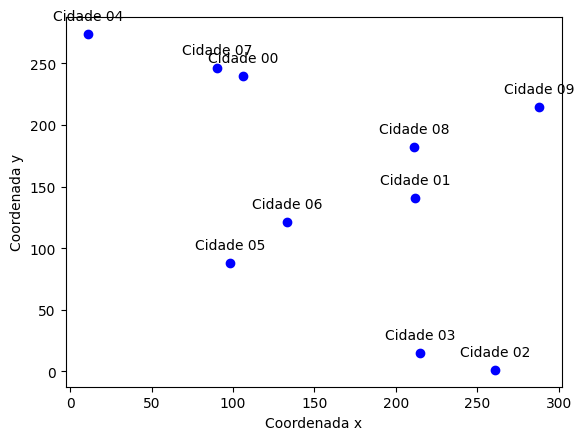

In [11]:
plota_cidades(CIDADES)

In [12]:
from pprint import pprint
from functools import partial
from itertools import permutations


from funcoes_fera_4_10 import populacao_caixeiro as cria_populacao
from funcoes_fera_4_10 import funcao_objetivo_pop_caixeiro
from funcoes_fera_4_10 import funcao_objetivo_caixeiro
from funcoes_fera_4_10 import selecao_torneio_min as funcao_selecao
from funcoes_fera_4_10 import cruzamento_ordenado_com_preferencia as funcao_cruzamento
from funcoes_fera_4_10 import mutacao_troca_com_preferencia as funcao_mutacao



Vamos definir os parâmetros do nosso problema, bem como do algoritmo.

In [13]:
TAMANHO_POPULACAO = 100
NUM_GERACOES = 5000
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [14]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
pprint(populacao)


[['Cidade 00',
  'Cidade 05',
  'Cidade 07',
  'Cidade 01',
  'Cidade 09',
  'Cidade 03',
  'Cidade 06',
  'Cidade 02',
  'Cidade 08',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 03',
  'Cidade 05',
  'Cidade 07',
  'Cidade 01',
  'Cidade 09',
  'Cidade 08',
  'Cidade 04',
  'Cidade 06',
  'Cidade 02'],
 ['Cidade 00',
  'Cidade 05',
  'Cidade 09',
  'Cidade 03',
  'Cidade 07',
  'Cidade 01',
  'Cidade 06',
  'Cidade 02',
  'Cidade 04',
  'Cidade 08'],
 ['Cidade 00',
  'Cidade 09',
  'Cidade 01',
  'Cidade 05',
  'Cidade 03',
  'Cidade 07',
  'Cidade 08',
  'Cidade 02',
  'Cidade 06',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 09',
  'Cidade 05',
  'Cidade 01',
  'Cidade 03',
  'Cidade 07',
  'Cidade 08',
  'Cidade 02',
  'Cidade 06',
  'Cidade 04'],
 ['Cidade 00',
  'Cidade 07',
  'Cidade 05',
  'Cidade 01',
  'Cidade 09',
  'Cidade 03',
  'Cidade 06',
  'Cidade 04',
  'Cidade 08',
  'Cidade 02'],
 ['Cidade 00',
  'Cidade 09',
  'Cidade 07',
  'Cidade 05',
  'Cidade 03',
  'Cidade 01',
  'C

In [15]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)

Após isso, basta rodar as gerações e verificar qual melhor candidato após as gerações se passarem.

In [16]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 00', 'Cidade 07', 'Cidade 09', 'Cidade 01', 'Cidade 05', 'Cidade 03', 'Cidade 02', 'Cidade 08', 'Cidade 06', 'Cidade 04'] com distância: 1218.668732108206



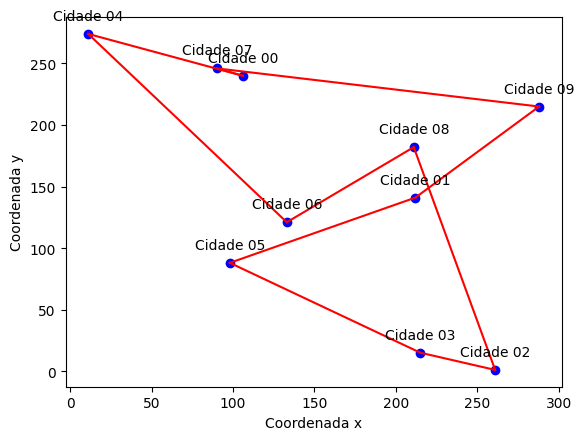

In [17]:
from funcoes_fera_4_10 import plota_trajeto

fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)

#### Conclusões

A aplicação de algoritmos genéticos mostrou-se uma abordagem eficaz e razoável para resolver o problema de geração de caminhos com restrições específicas, como início fixo na `Cidade 00` e preferência por cidades ímpares. A estrutura do algoritmo permitiu a exploração de diversas soluções viáveis dentro do espaço de busca, respeitando as regras impostas e promovendo diversidade por meio de cruzamentos e mutações controladas.

Apesar da simplicidade relativa das regras, o espaço de soluções possíveis é amplo, e técnicas de busca exaustiva seriam inviáveis em termos de desempenho. Nesse contexto, os algoritmos genéticos se destacaram por sua capacidade de encontrar boas soluções em tempo viável, balanceando exploração e aproveitamento das melhores rotas encontradas durante as gerações. Isso evidencia o potencial dessa classe de algoritmos para resolver problemas de otimização com múltiplas restrições.


### Referência

1. Cassar, Daniel R. "ATP-303 GA 4.3 - Problema do Caixeiro".